# Question 1

In [47]:
!pip install mplfinance
!pip install -U scikit-learn

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import random
import sklearn
import sklearn.model_selection

from datetime import datetime

### Part 1-1

In [4]:
full_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [5]:
table = full_table[[datetime.strptime(t, '%Y-%m-%d') < (datetime(2010, 1, 1)) for t in full_table['Date added']]]

In [6]:
table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [7]:
raw_prices = yf.download(tickers=table['Symbol'].tolist(), start='2010-01-01', interval='1d', group_by='ticker')

[*********************100%%**********************]  290 of 290 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2023-12-26)')


In [8]:
raw_prices

NI                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2010-01-04   6.113949   6.165029   6.062868   6.094303   3.754156   6905603   
2010-01-05   6.110020   6.141454   6.019646   6.078585   3.744475   8784322   
2010-01-06   6.082515   6.098232   5.972495   6.007859   3.700907   7382791   
2010-01-07   5.992141   6.011788   5.897839   5.933202   3.654917   7407223   
2010-01-08   5.893910   5.944990   5.842829   5.901768   3.635555  15739298   
...               ...        ...        ...        ...        ...       ...   
2023-12-19  26.520000  26.650000  26.400000  26.540001  26.540001   5211600   
2023-12-20  26.490000  26.650000  26.049999  26.080000  26.080000   5029400   
2023-12-21  26.170000  26.340000  25.889999  26.040001  26.040001   3082800   
2023-12-22  26.170000  26.450001  26.170000  26.250000  26.250000   3440000   
2023-12-26  26.170000  26.514999  26.151800  26.500000  26.500000   1026572   

                   TMO                                      ... BF.B        \
                  Open        High         Low       Close  ...  Low Close   
Date                                                        ...              
2010-01-04   48.029999   48.029999   47.450001   47.500000  ...  NaN   NaN   
2010-01-05   47.610001   47.750000   47.250000   47.660000  ...  NaN   NaN   
2010-01-06   47.779999   48.439999   47.619999   48.110001  ...  NaN   NaN   
2010-01-07   48.119999   48.200001   47.759998   48.110001  ...  NaN   NaN   
2010-01-08   48.119999   48.919998   47.880001   48.919998  ...  NaN   NaN   
...                ...         ...         ...         ...  ...  ...   ...   
2023-12-19  521.010010  528.859985  519.809998  528.140015  ...  NaN   NaN   
2023-12-20  528.000000  532.489990  519.369995  519.429993  ...  NaN   NaN   
2023-12-21  518.070007  527.030029  518.070007  526.559998  ...  NaN   NaN   
2023-12-22  528.090027  532.919983  526.900024  529.049988  ...  NaN   NaN   
2023-12-26  526.880005  531.239990  525.780823  531.195007  ...  NaN   NaN   

                                   CPB                                   \
           Adj Close Volume       Open       High        Low      Close   
Date                                                                      
2010-01-04       NaN    NaN  33.910000  33.980000  33.709999  33.869999   
2010-01-05       NaN    NaN  33.919998  34.169998  33.599998  33.930000   
2010-01-06       NaN    NaN  33.840000  33.919998  33.360001  33.549999   
2010-01-07       NaN    NaN  33.450001  33.450001  32.970001  33.040001   
2010-01-08       NaN    NaN  33.040001  33.119999  32.680000  32.830002   
...              ...    ...        ...        ...        ...        ...   
2023-12-19       NaN    NaN  43.849998  44.009998  43.349998  43.680000   
2023-12-20       NaN    NaN  43.410000  43.410000  42.580002  42.599998   
2023-12-21       NaN    NaN  42.680000  42.880001  42.230000  42.770000   
2023-12-22       NaN    NaN  42.910000  43.349998  42.840000  43.000000   
2023-12-26       NaN    NaN  42.740002  43.040001  42.739799  43.014999   

                                
            Adj Close   Volume  
Date                            
2010-01-04  22.306593  1574200  
2010-01-05  22.346107  2497100  
2010-01-06  22.095835  2829500  
2010-01-07  21.759956  3232600  
2010-01-08  21.621662  2203200  
...               ...      ...  
2023-12-19  43.680000  2561400  
2023-12-20  42.599998  4020900  
2023-12-21  42.770000  2356000  
2023-12-22  43.000000  2051600  
2023-12-26  43.014999   844896  

[3519 rows x 1740 columns]

### Part 1-2


In [9]:
null_values = raw_prices.isnull()
print(null_values.sum(axis=1).sum(axis=0))

39702


In [10]:
prices = raw_prices.interpolate(method='linear', axis=1)
prices = prices.fillna(method='bfill')
prices = prices.dropna(axis=1)

In [11]:
null_values = prices.isnull()
print(null_values.sum().sum())

0


In [12]:
prices.head()

NI                                          \
                         Open      High       Low     Close Adj Close   
Date                                                                    
2010-01-04 00:00:00  6.113949  6.165029  6.062868  6.094303  3.754156   
2010-01-05 00:00:00  6.110020  6.141454  6.019646  6.078585  3.744475   
2010-01-06 00:00:00  6.082515  6.098232  5.972495  6.007859  3.700907   
2010-01-07 00:00:00  5.992141  6.011788  5.897839  5.933202  3.654917   
2010-01-08 00:00:00  5.893910  5.944990  5.842829  5.901768  3.635555   

                                       TMO                                   \
                         Volume       Open       High        Low      Close   
Date                                                                          
2010-01-04 00:00:00   6905603.0  48.029999  48.029999  47.450001  47.500000   
2010-01-05 00:00:00   8784322.0  47.610001  47.750000  47.250000  47.660000   
2010-01-06 00:00:00   7382791.0  47.779999  48.439999  47.619999  48.110001   
2010-01-07 00:00:00   7407223.0  48.119999  48.200001  47.759998  48.110001   
2010-01-08 00:00:00  15739298.0  48.119999  48.919998  47.880001  48.919998   

                     ...          BF.B                               \
                     ...           Low         Close      Adj Close   
Date                 ...                                              
2010-01-04 00:00:00  ...  9.547574e+05  7.160765e+05  477395.650000   
2010-01-05 00:00:00  ...  1.033100e+06  7.748337e+05  516567.085713   
2010-01-06 00:00:00  ...  1.428872e+06  1.071662e+06  714452.742857   
2010-01-07 00:00:00  ...  1.440129e+06  1.080105e+06  720081.035715   
2010-01-08 00:00:00  ...  1.106128e+06  8.296046e+05  553080.742858   

                                          CPB                        \
                            Volume       Open       High        Low   
Date                                                                  
2010-01-04 00:00:00  238714.780000  33.910000  33.980000  33.709999   
2010-01-05 00:00:00  258300.502856  33.919998  34.169998  33.599998   
2010-01-06 00:00:00  357243.291429  33.840000  33.919998  33.360001   
2010-01-07 00:00:00  360057.242858  33.450001  33.450001  32.970001   
2010-01-08 00:00:00  276556.891429  33.040001  33.119999  32.680000   

                                                      
                         Close  Adj Close     Volume  
Date                                                  
2010-01-04 00:00:00  33.869999  22.306593  1574200.0  
2010-01-05 00:00:00  33.930000  22.346107  2497100.0  
2010-01-06 00:00:00  33.549999  22.095835  2829500.0  
2010-01-07 00:00:00  33.040001  21.759956  3232600.0  
2010-01-08 00:00:00  32.830002  21.621662  2203200.0  

[5 rows x 1740 columns]

In [13]:
close_prices = prices.xs('Close', level=1, axis=1)
close_prices

,NI,TMO,USB,CMS,STZ,CCL,PPL,NEE,CF,ETN,...,HES,WBA,A,PNW,MCO,PEP,HRL,OMC,BF.B,CPB
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.094303,47.500000,22.879999,15.790000,16.120001,32.060001,30.242558,13.312500,18.368000,32.160000,...,63.160000,37.299999,22.389128,36.880001,27.270000,61.240002,9.570000,39.619999,7.160765e+05,33.869999
2010-01-05,6.078585,47.660000,23.459999,15.740000,15.920000,32.369999,29.851370,13.182500,18.666000,31.969999,...,63.549999,37.000000,22.145924,36.380001,26.990000,61.980000,9.620000,39.480000,7.748337e+05,33.930000
2010-01-06,6.007859,48.110001,23.709999,15.690000,16.129999,31.790001,29.916569,13.312500,19.444000,31.830000,...,63.720001,36.720001,22.067240,36.759998,26.420000,61.360001,9.567500,39.169998,1.071662e+06,33.549999
2010-01-07,5.933202,48.110001,24.170000,15.490000,15.970000,32.139999,29.627834,13.275000,19.247999,32.299999,...,64.940002,36.939999,22.038628,36.689999,26.340000,60.970001,9.515000,38.939999,1.080105e+06,33.040001
2010-01-08,5.901768,48.919998,24.209999,15.550000,15.660000,33.220001,29.534695,13.160000,19.662001,33.025002,...,65.830002,36.990002,22.031473,36.919998,26.840000,60.770000,9.522500,39.389999,8.296046e+05,32.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19,26.540001,528.140015,44.209999,58.040001,241.089996,18.709999,26.879999,61.570000,78.309998,238.149994,...,147.080002,26.030001,139.789993,72.680000,390.529999,167.949997,31.730000,86.680000,4.776251e+05,43.680000
2023-12-20,26.080000,519.429993,42.459999,57.099998,235.070007,18.070000,26.410000,59.840000,77.769997,233.949997,...,145.770004,25.400000,138.179993,70.730003,382.450012,165.690002,31.430000,85.730003,4.902248e+05,42.599998
2023-12-21,26.040001,526.559998,43.310001,56.910000,235.869995,19.190001,26.389999,59.599998,79.830002,237.289993,...,146.149994,26.059999,138.940002,70.809998,386.130005,166.970001,31.670000,86.430000,3.643958e+05,42.770000


In [14]:
random.seed(42)
index = random.randint(0, close_prices.shape[1])
chosen_stock = close_prices.iloc[:, index]

In [15]:
index

57

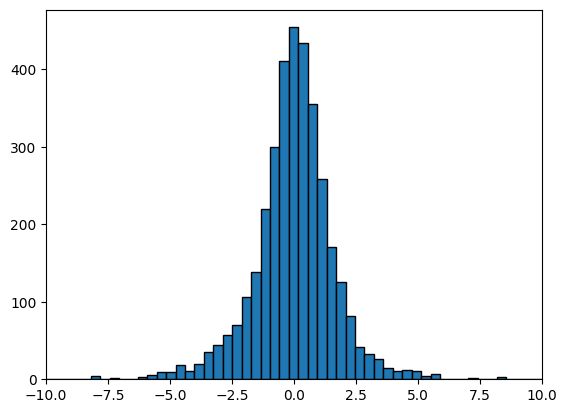

In [16]:
current_close = chosen_stock.values
previous_close = np.zeros(current_close.shape)
previous_close[1:] = current_close[0:-1]

close_price_return = ((current_close-previous_close)/current_close)*100
close_price_return = np.delete(close_price_return, 0)
plt.hist(close_price_return, bins=100, edgecolor='black')
plt.xlim(-10,10)
plt.show()

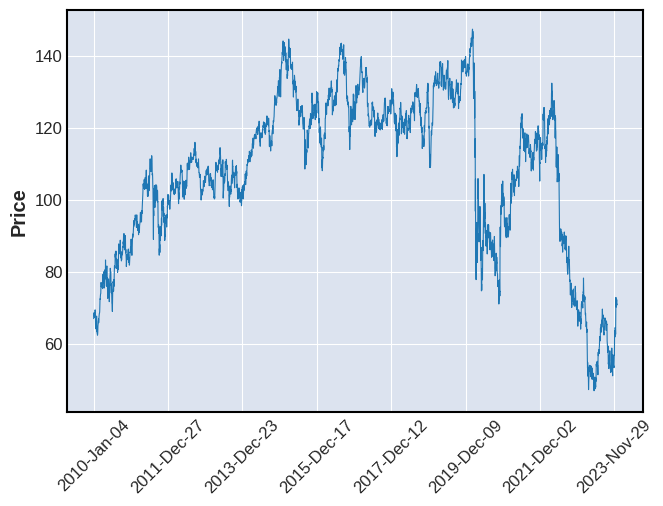

In [17]:
df = prices.iloc[:, 6*index:6*(index+1)].droplevel(0, axis=1)
df.index = pd.to_datetime(df.index)
mpf.plot(df, type='line')

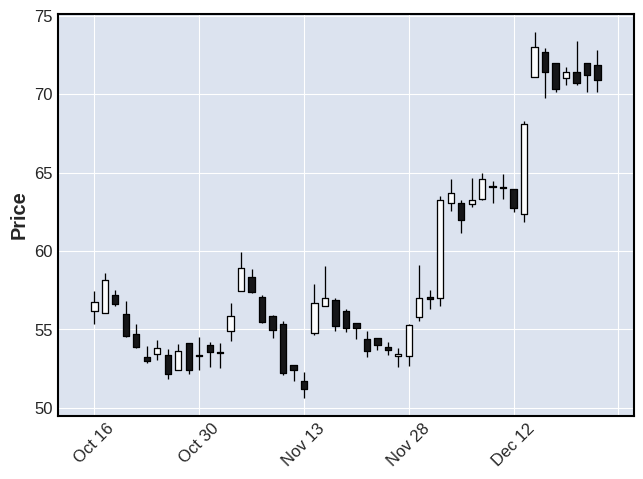

In [18]:
mpf.plot(df[-50:-1], type='candle')

### Part 1-3

In [19]:
stock_names = ['AAPL', 'AMZN', 'MSFT', 'AMGN', 'VFC']
data = close_prices[stock_names]
data

,AAPL,AMZN,MSFT,AMGN,VFC
Date,,,,,
2010-01-04,7.643214,6.695000,30.950001,57.720001,17.274012
2010-01-05,7.656429,6.734500,30.959999,57.220001,17.603579
2010-01-06,7.534643,6.612500,30.770000,56.790001,17.532957
2010-01-07,7.520714,6.500000,30.450001,56.270000,17.871941
2010-01-08,7.570714,6.676000,30.660000,56.770000,17.777779
...,...,...,...,...,...
2023-12-19,196.940002,153.789993,373.260010,278.440002,18.740000
2023-12-20,194.830002,152.119995,370.619995,275.179993,17.940001
2023-12-21,194.679993,153.839996,373.540009,279.329987,19.209999


In [20]:
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

In [21]:
for i, (train_index, test_index) in enumerate(tss.split(data)):
  if(i==3):
    print(train_index)

[   0    1    2 ... 2344 2345 2346]


### Part 1-4

In [22]:
data_np = data.values
data_np.shape

(3519, 5)

In [23]:
window_size = 20

x = []
y = []
for i, stock_name in enumerate(stock_names):
  series = data_np[:, i]
  x_stock = []
  y_stock = []
  for j in range(window_size, len(series)):
    x_stock.append(series[j-window_size:j])
    y_stock.append(series[j])
  x_stock = np.array(x_stock)
  y_stock = np.array(y_stock)
  x.append(x_stock)
  y.append(y_stock)

In [24]:
print(x[0].shape)
print(y[0].shape)

(3499, 20)
(3499,)


### Part 1-5

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Conv1D, ConvLSTM1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteError

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
sc = MinMaxScaler(feature_range=(0,1))

In [27]:
LSTM_Model = Sequential([
    LSTM(units=200, return_sequences=True, input_shape=(x[0].shape[1], 1)),
    Dropout(0.2),
    LSTM(units=200, return_sequences=True),
    Dropout(0.2),
    LSTM(units=200, return_sequences=True),
    Dropout(0.2),
    LSTM(units=200, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

GRU_Model = Sequential([
    GRU(units=200, return_sequences=True, input_shape=(x[0].shape[1], 1)),
    Dropout(0.2),
    GRU(units=200, return_sequences=True),
    Dropout(0.2),
    GRU(units=200, return_sequences=True),
    Dropout(0.2),
    GRU(units=200, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

BiLSTM_Model = Sequential([
    Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(x[0].shape[1], 1)),
    Dropout(0.2),
    Bidirectional(LSTM(units=200, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(units=200, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(units=200, return_sequences=False)),
    Dropout(0.2),
    Dense(units=1)
])

MLP_Model = Sequential([
    Dense(units=200, activation='relu', input_shape= (x[0].shape[1], ) ),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

CNN_Model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x[0].shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Dropout(0.2),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=1)
])

ConvLSTM_Model = Sequential([
    ConvLSTM1D(filters=64, kernel_size=1, activation='relu', return_sequences=True, input_shape=(x[0].shape[1], 1, 1)),
    Dropout(0.2),
    ConvLSTM1D(filters=64, kernel_size=1, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

In [28]:
def Model_Metrics(base_model):
  test_metrics = np.zeros([len(stock_names), 3])
  m = 0
  for i, stock in enumerate(stock_names):
    n = 0
    for j, (train_indices, test_indices) in enumerate(tss.split(data_np[:-window_size, i])):
      optimizer = Adam(learning_rate=0.001)
      model = tf.keras.models.clone_model(base_model)
      model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsolutePercentageError(), MeanAbsoluteError()])

      x_train = (x[i])[train_indices, :]
      y_train = (y[i])[train_indices]
      x_test = (x[i])[test_indices, :]
      y_test = (y[i])[test_indices]

      scaler_x = MinMaxScaler(feature_range=(0,1))
      scaler_y = MinMaxScaler(feature_range=(0,1))
      scaler_x.fit_transform(x_train)
      scaler_y.fit_transform(y_train.reshape(-1, 1))

      x_train_scaled = scaler_x.transform(x_train)
      y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
      x_test_scaled = scaler_x.transform(x_test)
      y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

      if(base_model == ConvLSTM_Model):
        x_train_scaled = x_train_scaled.reshape([-1, x_train.shape[1], 1, 1])
        x_test_scaled = x_test_scaled.reshape([-1, x_test.shape[1], 1, 1])

      history = model.fit(x_train_scaled, y_train_scaled, validation_split = 0.2, epochs=32, batch_size=128, verbose=0)

      y_pred_scaled = model.predict(x_test_scaled, verbose=0)

      mse = MeanSquaredError()(y_test_scaled, y_pred_scaled)
      mape = MeanAbsolutePercentageError()(y_test_scaled, y_pred_scaled)
      mae = MeanAbsoluteError()(y_test_scaled, y_pred_scaled)

      test_metrics[i, 0] += mse
      test_metrics[i, 1] += mape
      test_metrics[i, 2] += mae

      del model, x_train, y_train, x_test, y_test, x_train_scaled, x_test_scaled, y_pred_scaled, history

      n += 1
      print(n)
    m += 1
    print('-- Stock ', m, 'finished.')
  test_metrics /= cv_n_splits
  return test_metrics

In [ ]:
LSTM_metrics = Model_Metrics(LSTM_Model)
LSTM_metrics

1
2
3
4
5
-- Stock  1 finished.
1
2
3
4
5
-- Stock  2 finished.
1
2
3
4
5
-- Stock  3 finished.
1
2
3
4
5
-- Stock  4 finished.
1
2
3
4
5
-- Stock  5 finished.


array([[2.25378826e-02, 7.38811951e+00, 1.01364350e-01],
       [3.20122004e-02, 9.32906036e+00, 1.28597164e-01],
       [3.23045433e-02, 7.98682251e+00, 1.19043279e-01],
       [3.49132538e-02, 6.83105316e+00, 1.11347616e-01],
       [8.87485221e-03, 1.31275787e+01, 5.87953687e-02]])

In [ ]:
GRU_metrics = Model_Metrics(GRU_Model)
GRU_metrics

1
2
3
4
5
-- Stock  1 finished.
1
2
3
4
5
-- Stock  2 finished.
1
2
3
4
5
-- Stock  3 finished.
1
2
3
4
5
-- Stock  4 finished.
1
2
3
4
5
-- Stock  5 finished.


array([[3.46602425e-03, 3.40621681e+00, 4.28821385e-02],
       [7.14976415e-03, 4.90064507e+00, 6.67099237e-02],
       [2.31480189e-03, 3.10611248e+00, 3.61183971e-02],
       [1.41900629e-02, 5.01634674e+00, 7.75336027e-02],
       [2.76430827e-03, 7.07564621e+00, 3.59157443e-02]])

In [ ]:
BiLSTM_metrics = Model_Metrics(BiLSTM_Model)
BiLSTM_metrics

1
2
3
4
5
-- Stock  1 finished.
1
2
3
4
5
-- Stock  2 finished.
1
2
3
4
5
-- Stock  3 finished.
1
2
3
4
5
-- Stock  4 finished.
1
2
3
4
5
-- Stock  5 finished.


array([[ 0.01263668,  5.84233627,  0.07597427],
       [ 0.03553617,  8.99012909,  0.1359401 ],
       [ 0.03686234,  9.65815735,  0.14263536],
       [ 0.07469472,  6.95285263,  0.13619218],
       [ 0.01078445, 10.51775055,  0.06128413]])

In [ ]:
MLP_metrics = Model_Metrics(MLP_Model)
MLP_metrics

1
2
3
4
5
-- Stock  1 finished.
1
2
3
4
5
-- Stock  2 finished.
1
2
3
4
5
-- Stock  3 finished.
1
2
3
4
5
-- Stock  4 finished.
1
2
3
4
5
-- Stock  5 finished.


array([[ 0.11909199, 24.44932404,  0.30753314],
       [ 0.13590233, 26.05633545,  0.34074144],
       [ 0.11936283, 23.87771759,  0.31639972],
       [ 0.12900407, 25.34142456,  0.32783222],
       [ 0.05252857, 39.85463257,  0.20510273]])

In [ ]:
CNN_metrics = Model_Metrics(CNN_Model)
CNN_metrics

1
2
3
4
5
-- Stock  1 finished.
1
2
3
4
5
-- Stock  2 finished.
1
2
3
4
5
-- Stock  3 finished.
1
2
3
4
5
-- Stock  4 finished.
1
2
3
4
5
-- Stock  5 finished.


array([[ 0.32200592, 41.89423523,  0.51961374],
       [ 0.32506685, 39.82055054,  0.52437072],
       [ 0.35614903, 41.91011963,  0.55350142],
       [ 0.3332588 , 39.36318359,  0.51815972],
       [ 0.13076172, 42.93783875,  0.32189059]])

In [ ]:
ConvLSTM_metrics = Model_Metrics(ConvLSTM_Model)
ConvLSTM_metrics

1
2
3
4
5
-- Stock  1 finished.
1
2
3
4
5
-- Stock  2 finished.
1
2
3
4
5
-- Stock  3 finished.
1
2
3
4
5
-- Stock  4 finished.
1
2
3
4
5
-- Stock  5 finished.


array([[ 0.68987975, 14.51110535,  0.28327763],
       [ 2.01880322, 33.93088989,  0.66072278],
       [ 0.79022908, 21.7687149 ,  0.38028853],
       [ 1.5958086 , 16.11213379,  0.38096752],
       [ 0.07486662, 17.22041626,  0.11479743]])

In [29]:
def plot_metric(history_list, metric):
    model_list_names = ['LSTM Model', 'GRU Model', 'BiLSTM Model', 'MLP Model', 'CNN Model', 'ConvLSTM Model']
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 24))
    for i, model_name in enumerate(model_list_names):
      history = history_list[i]
      train_metrics = history.history[metric]
      val_metrics = history.history['val_'+metric]
      epochs = range(1, len(train_metrics) + 1)
      axes[i].plot(epochs, train_metrics)
      axes[i].plot(epochs, val_metrics)
      axes[i].set_title(model_name)
      axes[i].legend(["train_"+metric, 'val_'+metric])

In [ ]:
model_list = [LSTM_Model, GRU_Model, BiLSTM_Model, MLP_Model, CNN_Model, ConvLSTM_Model]
plot = []
history = []
for i, base_model in enumerate(model_list):
  model = tf.keras.models.clone_model(base_model)
  optimizer = Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics='mean_squared_error')

  s = 1
  n_train = int(0.8*x[s].shape[0])
  n_test = x[s].shape[0] - n_train

  train_indices = list(range(n_train))
  test_indices = list(range(n_train, n_train+n_test))

  x_train = (x[s])[train_indices, :]
  y_train = (y[s])[train_indices]
  x_test = (x[s])[test_indices, :]
  y_test = (y[s])[test_indices]

  scaler_x = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  scaler_x.fit_transform(x_train)
  scaler_y.fit_transform(y_train.reshape(-1, 1))

  x_train_scaled = scaler_x.transform(x_train)
  y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
  x_test_scaled = scaler_x.transform(x_test)
  y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

  if(base_model == ConvLSTM_Model):
    x_train_scaled = x_train_scaled.reshape([-1, x_train.shape[1], 1, 1])
    x_test_scaled = x_test_scaled.reshape([-1, x_test.shape[1], 1, 1])

  history.append(model.fit(x_train_scaled, y_train_scaled, validation_split = 0.2, epochs=100, batch_size=128, verbose=1))

  y_pred_scaled = model.predict(x_test_scaled).reshape([-1, 1])
  y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape([-1, ])
  p1 = np.concatenate((y_train, y_test))
  p2 = np.concatenate((y_train, y_pred))
  plot.append([p1, p2])

Epoch 1/100
18/18 [==============================] - 8s 97ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 6.2244e-04 - mean_squared_error: 6.2244e-04 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 3.7146e-04 - mean_squared_error: 3.7146e-04 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/100
18/18 [==============================] - 0s 16ms/step - loss: 2.8366e-04 - mean_squared_error: 2.8366e-04 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 3.0078e-04 - mean_squared_error: 3.0078e-04 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/100
18/18 [==============================] - 0s 18ms/step - loss: 2.2578e-04 - mean_squared_error: 2.2578e-04 - val_loss: 0.0018 - val_mean_squared_er

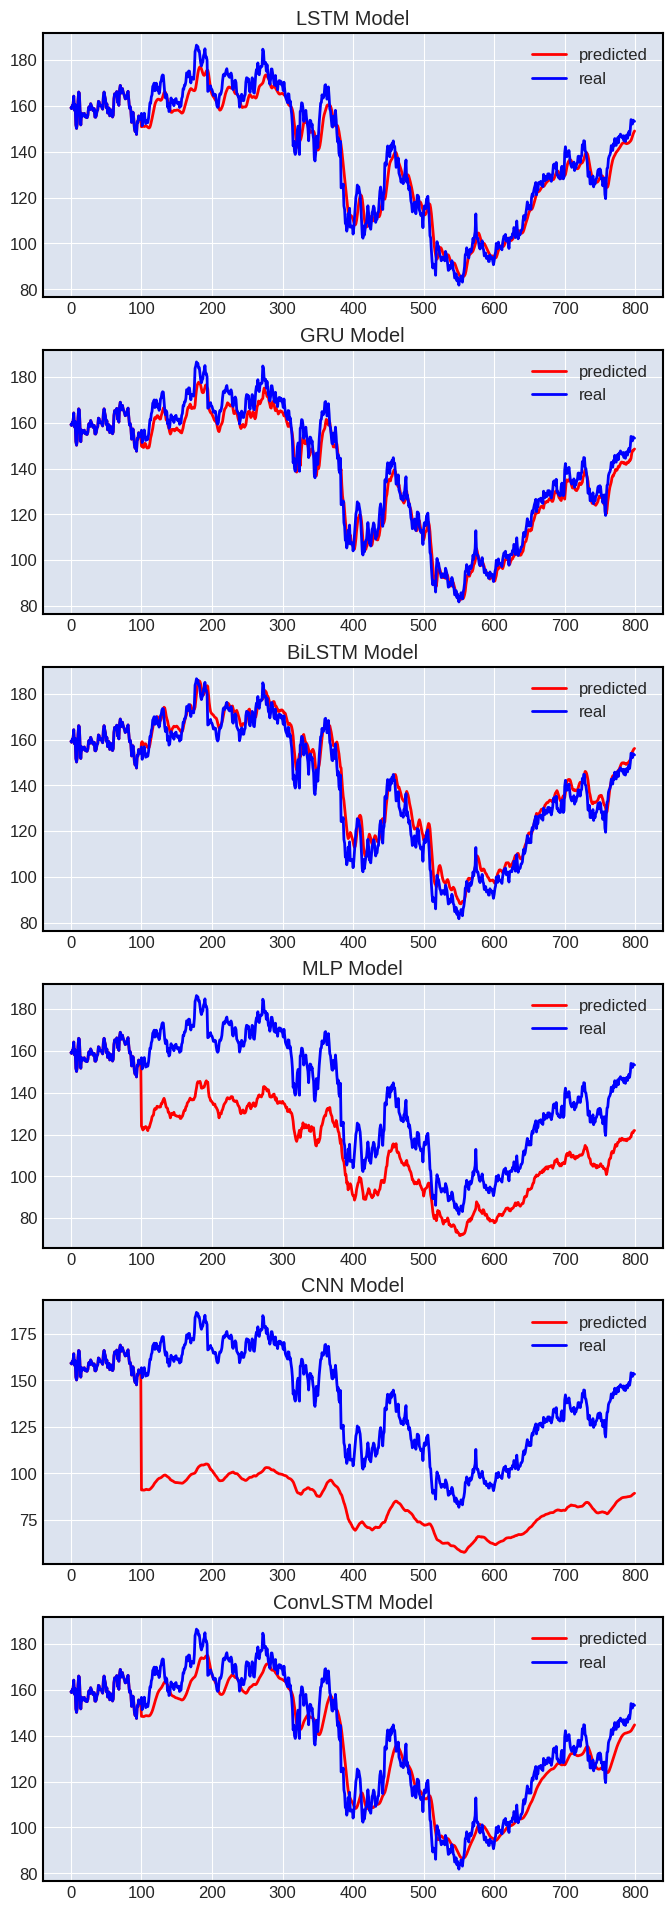

In [ ]:
model_list_names = ['LSTM Model', 'GRU Model', 'BiLSTM Model', 'MLP Model', 'CNN Model', 'ConvLSTM Model']
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 24))
for i, model_name in enumerate(model_list_names):
  axes[i].plot(plot[i][1][-800:], color='red')
  axes[i].plot(plot[i][0][-800:], color='blue')
  axes[i].set_title(model_name)
  axes[i].legend(['predicted', 'real'])

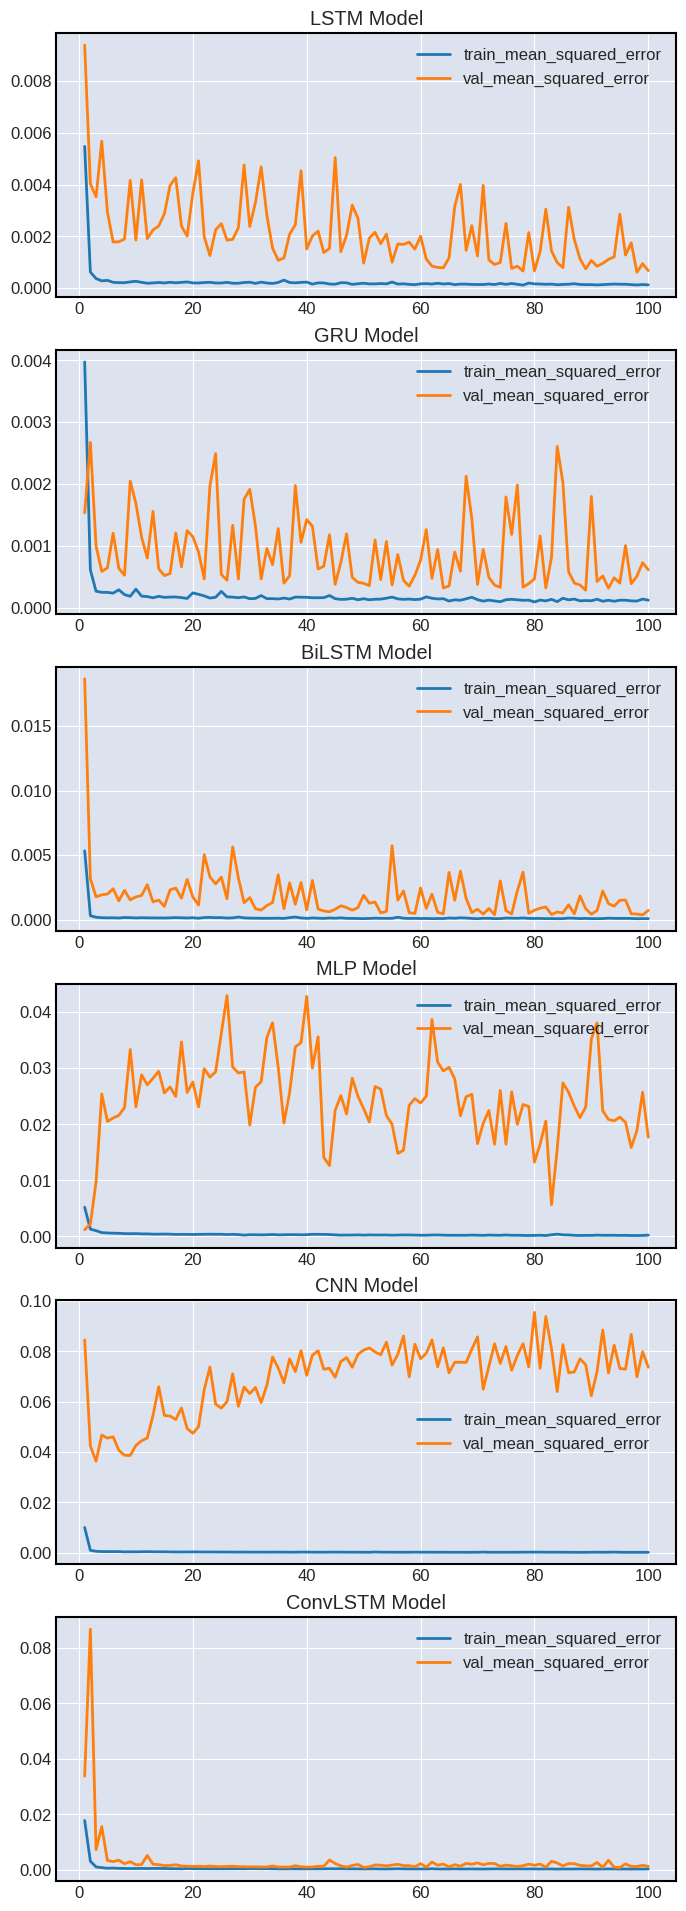

In [ ]:
plot_metric(history, 'mean_squared_error')

Part* Not Scaling

In [33]:
model = tf.keras.models.clone_model(LSTM_Model)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics='mean_squared_error')

s = 1
n_train = int(0.8*x[s].shape[0])
n_test = x[s].shape[0] - n_train

train_indices = list(range(n_train))
test_indices = list(range(n_train, n_train+n_test))

x_train = (x[s])[train_indices, :]
y_train = (y[s])[train_indices]
x_test = (x[s])[test_indices, :]
y_test = (y[s])[test_indices]

h = model.fit(x_train, y_train, validation_split = 0.2, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
18/18 [==============================] - 11s 119ms/step - loss: 840.1873 - mean_squared_error: 840.1873 - val_loss: 10289.5850 - val_mean_squared_error: 10289.5850
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 590.7855 - mean_squared_error: 590.7855 - val_loss: 9568.2910 - val_mean_squared_error: 9568.2910
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 558.6909 - mean_squared_error: 558.6909 - val_loss: 9120.9092 - val_mean_squared_error: 9120.9092
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 550.0243 - mean_squared_error: 550.0243 - val_loss: 8887.9463 - val_mean_squared_error: 8887.9463
Epoch 5/100
18/18 [==============================] - 0s 15ms/step - loss: 548.1213 - mean_squared_error: 548.1213 - val_loss: 8762.8174 - val_mean_squared_error: 8762.8174
Epoch 6/100
18/18 [==============================] - 0s 15ms/step - loss: 552.6914 - mean_squared_error: 552.6914 - val_loss: 8759.4756 

### Part 1-6

In [48]:
y = data_np[:, 0]
y_pred = np.roll(y, 1)

In [49]:
y = np.delete(y, 0)
y_pred = np.delete(y_pred, 0)

In [50]:
scaler_y = MinMaxScaler(feature_range=(0,1))
scaler_y.fit_transform(y.reshape(-1, 1))

y_scaled = scaler_y.transform(y.reshape(-1, 1))
y_pred_scaled = scaler_y.transform(y_pred.reshape(-1, 1))

In [40]:
mse = MeanSquaredError()(y_scaled, y_pred_scaled)
mape = MeanAbsolutePercentageError()(y_scaled, y_pred_scaled)
mae = MeanAbsoluteError()(y_scaled, y_pred_scaled)

In [46]:
print(float(mse),', ',float(mape),', ',float(mae))

5.933563443250023e-05 ,  403.8964538574219 ,  0.004113502334803343
